In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import os
from tensorflow.keras import models
import numpy as np
from keras.datasets import mnist

In [ ]:
(train_image, train_labels), (test_image, test_labels) = mnist.load_data()

In [ ]:
print(train_image.shape)
print(train_labels.shape)
print(test_image.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
train_image=train_image/255.0
test_image=train_image/255.0

In [ ]:
'''class myCallback():
  def on_epochs_end(self, epochs,log={}):
    if (logs.get('loss')<.1):
      self.model.stop_training=True
  def set_model(self, model):
    self.model=model

callbacks=myCallback()'''

"class myCallback():\n  def on_epochs_end(self, epochs,log={}):\n    if (logs.get('loss')<.1):\n      self.model.stop_training=True\n  def set_model(self, model):\n    self.model=model\n    \ncallbacks=myCallback()"

In [ ]:
class myCallback(keras.callbacks.Callback):
  def __init__(self, some_parameter=None):
    super(myCallback, self).__init__()
    self.some_parameter = some_parameter

  def set_params(self, params):
    # Update callback attributes based on provided parameters
    for key, value in params.items():
      setattr(self, key, value)  # Set attribute using key and value

  # Implement other callback methods (on_epoch_end, on_batch_end, etc.)


In [ ]:
model= keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3) , activation='relu' , input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_image,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 82s 43ms/step - loss: 0.1158 - accuracy: 0.9645
Epoch 2/10
1875/1875 [==============================] - 80s 43ms/step - loss: 0.0391 - accuracy: 0.9879
Epoch 3/10
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0268 - accuracy: 0.9914
Epoch 4/10
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0187 - accuracy: 0.9942
Epoch 5/10
1875/1875 [==============================] - 97s 52ms/step - loss: 0.0153 - accuracy: 0.9949
Epoch 6/10
1875/1875 [==============================] - 108s 58ms/step - loss: 0.0119 - accuracy: 0.9960
Epoch 7/10
1875/1875 [==============================] - 131s 70ms/step - loss: 0.0100 - accuracy: 0.9967
Epoch 8/10
1875/1875 [==============================] - 108s 58ms/step - loss: 0.0079 - accuracy: 0.9973
Epoch 9/10
1875/1875 [==============================] - 80s 43ms/step - loss: 0.0067 - accuracy: 0.9978
Epoch 10/10
1875/1875 [==============================] - 78s 

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [ ]:
predictions=model.predict(test_image)

1875/1875 [==============================] - 3s 1ms/step


In [ ]:
predicted_classes = np.argmax(predictions, axis=1)  # Find the index of max probability
predicted_classes

array([5, 5, 5, ..., 5, 5, 5])

In [ ]:
print(test_labels[:100])

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9]


1/1 [==============================] - 0s 20ms/step


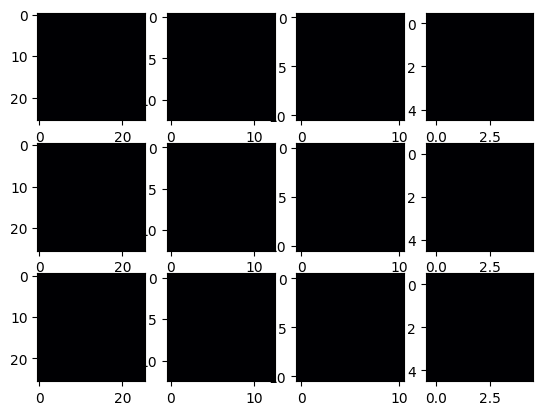

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras import models

f, axarr = plt.subplots(3,4)

FIRST_IMAGE=2
SECOND_IMAGE=5
THIRD_IMAGE=14
CONVOLUTION_NUMBER = 1

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,4):
  f1 = activation_model.predict(test_image[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)

  f2 = activation_model.predict(test_image[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)

  f3 = activation_model.predict(test_image[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

**Visualizing the Convilution and Pooling**

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras import models